                             FUNCTION - Data Science & BusinessAnalytics
    
                                TASK - Prediction using Supervised ML 
        
                                    NAME - PIYUSH GHOSH

In [2]:
#Importing neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("studentPercentage.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
nan_df=df[df.isna().any(axis=1)]
nan_df.head()

,Hours,Scores


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


##  Data Visualization

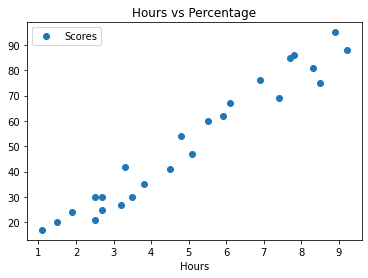

In [11]:
# plotting distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.show()

## Training  

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [14]:
regressor=LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

## Plotting the lines of regression 

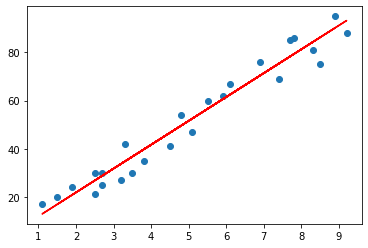

In [15]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='Red')
plt.show()

## Making Predictions 

In [16]:
print(x_test)
### Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
### Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [18]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105356


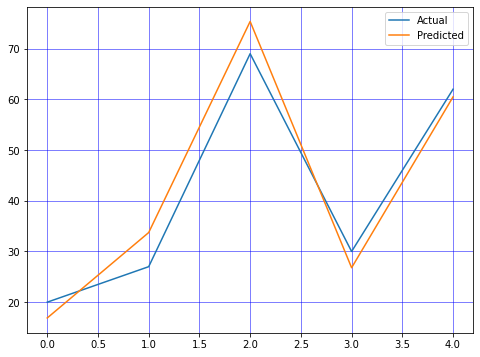

In [24]:
### Ploting the line graph to depict the diffrence between the actual and predicted value.
df.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [25]:
### Testing your own data.

hours = 9.25   
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics. 

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root mean squared Error: 4.6474476121003665


#plot for the TRAIN
 
    plt.scatter(X_train, y_train, color='red') # plotting the observation line

    plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line

    plt.title("Salary vs Experience (Training set)") # stating the title of the graph

    plt.xlabel("Years of experience") # adding the name of x-axis
    plt.ylabel("Salaries") # adding the name of y-axis
    plt.show() # specifies end of graph